<a href="https://colab.research.google.com/github/basharbayatna/Insurance_Dataset/blob/main/Data_Visualization_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Visualization (Core)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
url='/content/drive/MyDrive/AXSOSACADEMY/01-Fundamentals/Week03/Data/insurance_mod (1).csv'

In [4]:
df = pd.read_csv(url)
df.head(17)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16885.0
1,18,male,33.770,1,0,southeast,1726.0
2,28,male,33.000,3,0,southeast,4449.0
3,33,male,22.705,0,0,northwest,21984.0
4,32,male,28.880,0,0,northwest,3867.0
5,31,female,25.740,0,0,southeast,3757.0
6,46,female,33.440,1,0,southeast,8241.0
7,37,female,27.740,3,0,northwest,7282.0
8,37,male,29.830,2,0,northeast,6406.0
9,60,female,25.840,0,0,northwest,28923.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 73.3+ KB


#Explore Correlations

##1) Correlation Heatmap

In [6]:
correlation = df.corr(numeric_only=True)
correlation.round(2)

,age,bmi,children,smoker,charges
age,1.00,0.11,0.04,-0.03,0.30
bmi,0.11,1.00,0.01,0.00,0.20
children,0.04,0.01,1.00,0.01,0.07
smoker,-0.03,0.00,0.01,1.00,0.79
charges,0.30,0.20,0.07,0.79,1.00


[Text(0.5, 1.0, 'Heatmap')]

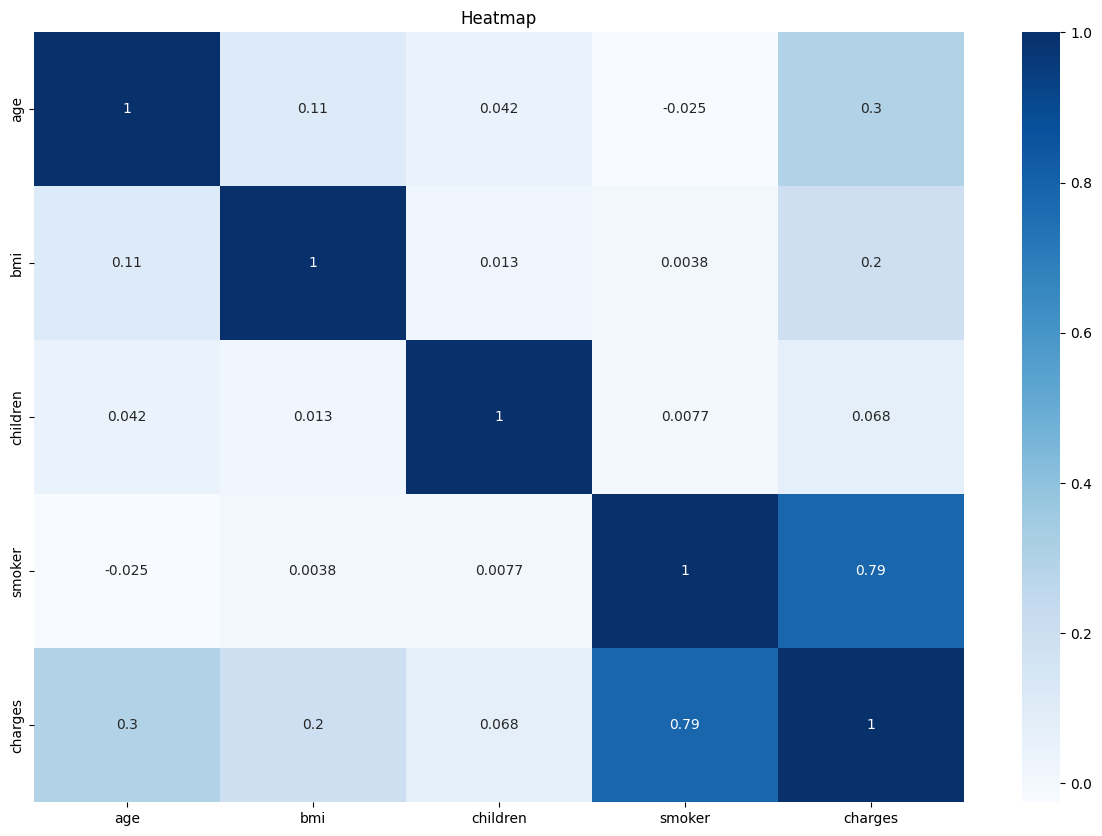

In [7]:
fig, ax=plt.subplots(figsize=(15,10))
sns.heatmap(correlation, cmap='Blues',annot=True)
ax.set(title='Heatmap')

-We can notice that there is a strong Positive Correlation between the Smoker column and the Charges

#Explore Charges VS. Smokers

##2) Barplot- Charges for Smokers vs. Non-Smokers

In [8]:
mean_charges = df.groupby('smoker')['charges'].mean().round(2)
mean_charges

,charges
smoker,
0,8434.26
1,32050.23


[Text(0.5, 1.0, 'Charges for Smoker vs. Non-Smoker')]

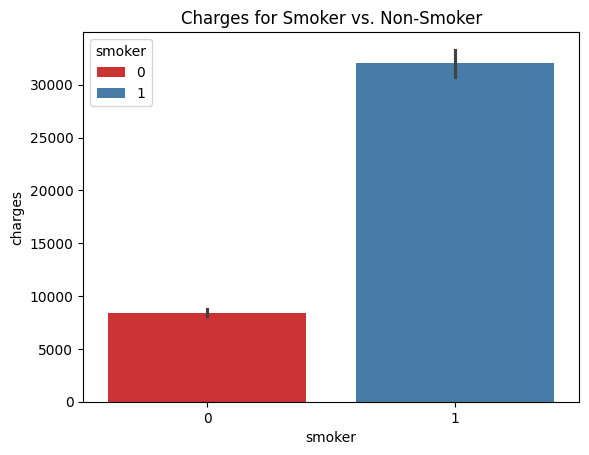

In [9]:
ax=sns.barplot(data=df, x='smoker', y='charges', palette='Set1',hue='smoker')
ax.set(title='Charges for Smoker vs. Non-Smoker')

-The mean of the Charges for the Smoker is much higher than the Non-Smoker

##3) BoxPlot

[Text(0.5, 1.0, 'Charges for Smoker vs. Non-Smoker')]

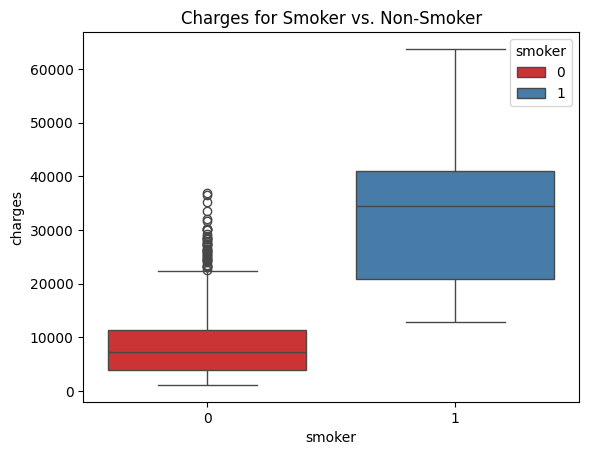

In [10]:
ax=sns.boxplot(data=df, x='smoker', y='charges',palette='Set1' , hue='smoker')
ax.set(title='Charges for Smoker vs. Non-Smoker')

-We can see that using the Boxplot allowed us to get a deeper look on the outliner in the Non-Smokers

#Explore Charges For Males vs. Females

##4) Barplot-Charges for Male VS. Female

/tmp/ipython-input-2566985998.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=df, x= 'sex', y='charges', palette='Set1')


[Text(0.5, 1.0, 'Charges for Males vs. Females')]

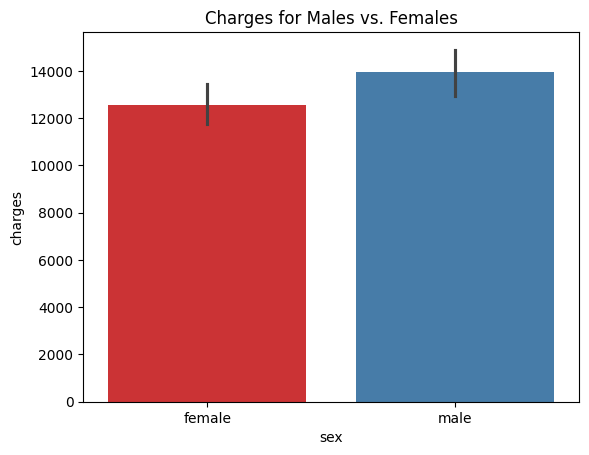

In [11]:
ax=sns.barplot(data=df, x= 'sex', y='charges', palette='Set1')
ax.set(title='Charges for Males vs. Females')

-We can clearly see that the mean of charges for male is higher than the mean of charges for female

##5) Grouped Barplot-Charges for Male/Female and smoker/Non-Smoker

[Text(0.5, 1.0, 'Charges for Males/Females and smoker/non-smoker')]

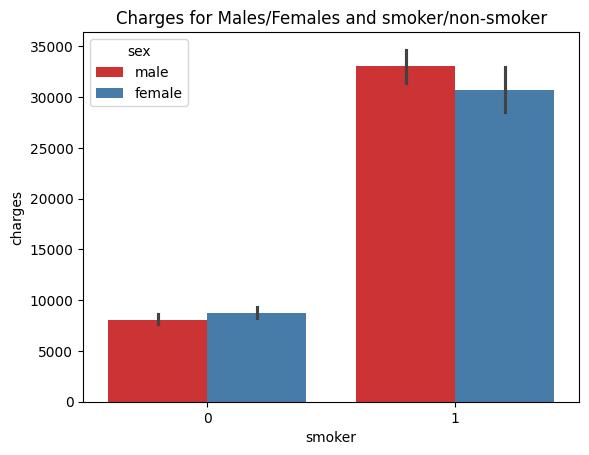

In [12]:
ax= sns.barplot(data=df, x='smoker' , y='charges', hue='sex' , palette='Set1')

ax.set(title='Charges for Males/Females and smoker/non-smoker')

-We can see that male smoker is the highest charged, also we can notice that the smoker/non-smoker state is the deciding factor in terms of the charge

#Explore Age Vs. Charges

##6) Scatter Plot-Age vs. Charges

[Text(0.5, 1.0, 'Age VS. Charges')]

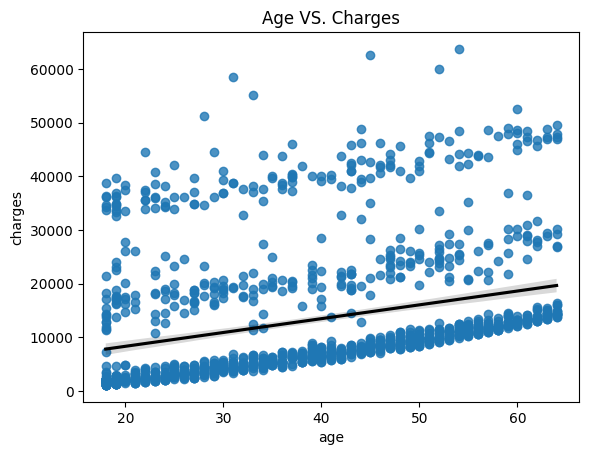

In [13]:
line_kws= dict(color='black')

ax=sns.regplot(data=df, x='age', y='charges', line_kws= line_kws)
ax.set(title='Age VS. Charges')

- We can see that there is a relation between the age and the charges,  where increasing the age will result in increasing the charges (positive correlation)

##7) Grouped Scatter Plot-Age vs. Charges colored by smoker




[Text(0.5, 1.0, 'Age VS. Charges colored by smoker')]

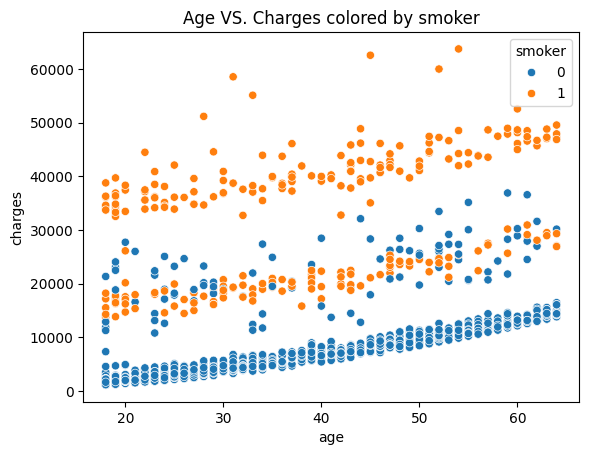

In [14]:
line_kws= dict(color='black')

ax = sns.scatterplot(data=df, y= 'charges', x='age', hue='smoker')

ax.set(title='Age VS. Charges colored by smoker')

-We can clearly see that distribution of the smoker is higher than the non-smoker  which indicates that the charges is increased by increasing the age and also the charged is increased by the smoking status

##8) Grouped Scatter Plot-Age vs. Charges colored by sex




[Text(0.5, 1.0, 'Age VS. Charges colored by sex')]

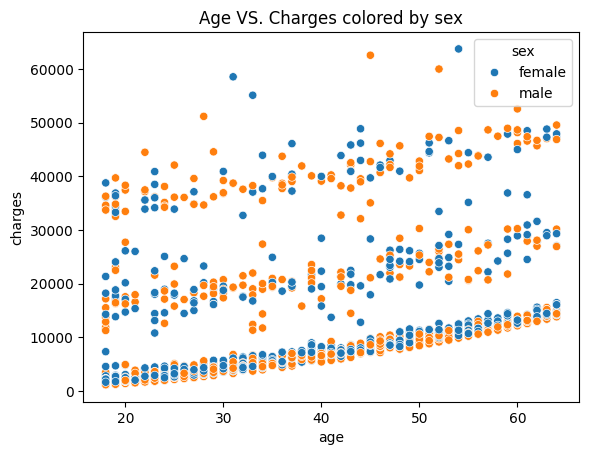

In [15]:
line_kws= dict(color='black')

ax = sns.scatterplot(data=df, y= 'charges', x='age', hue='sex')

ax.set(title='Age VS. Charges colored by sex')

-We can  see that line of the male is higher than the female line but in not that huge different which indicates that the charges is increased by increasing the age and also the charged is increased by the gender

#Explore BMI

##9) Regplot-charges VS. BMI

[Text(0.5, 1.0, 'Charges VS. BMI')]

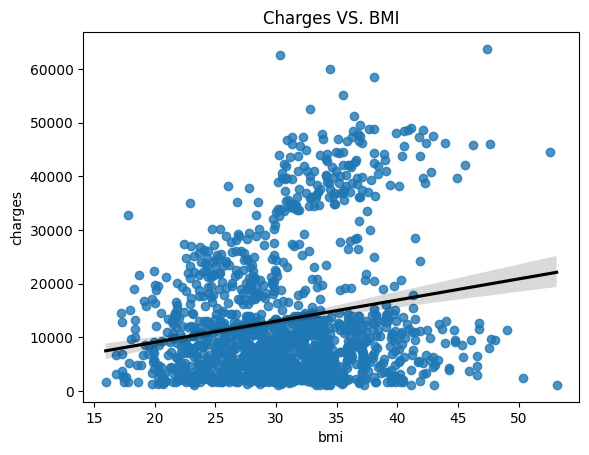

In [16]:
ax=sns.regplot(data=df, y='charges', x='bmi', line_kws= line_kws)
ax.set(title='Charges VS. BMI')


-we can see that there is a positive correlation between the BMI and the Charges where increasing the BMI for the indivisual will cause an increase in the charges

##10) scatterplot-charges VS. BMI-Colored by Smoker

[Text(0.5, 1.0, 'charged VS. BMI colored by Smoker')]

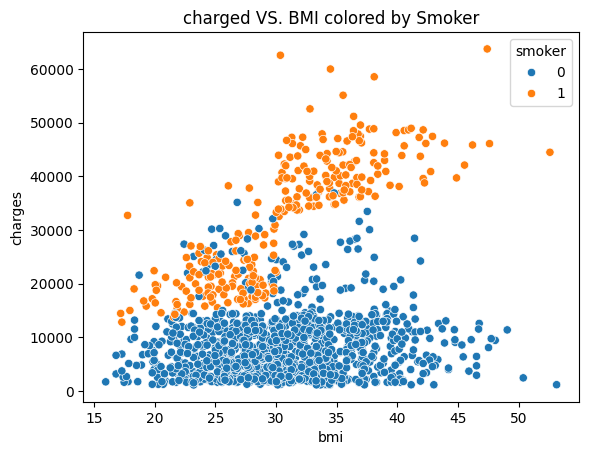

In [17]:

ax = sns.scatterplot(data=df, y= 'charges', x='bmi', hue='smoker')

ax.set(title='charged VS. BMI colored by Smoker')

-we can see that there is a huge positive correlation between the BMI and the Charges in the case of the smoker person, and there is a small positive corellation in the case of non-smoker

##11) Linear Model Plot-ChargesVS. BMI- Colored by Smoker

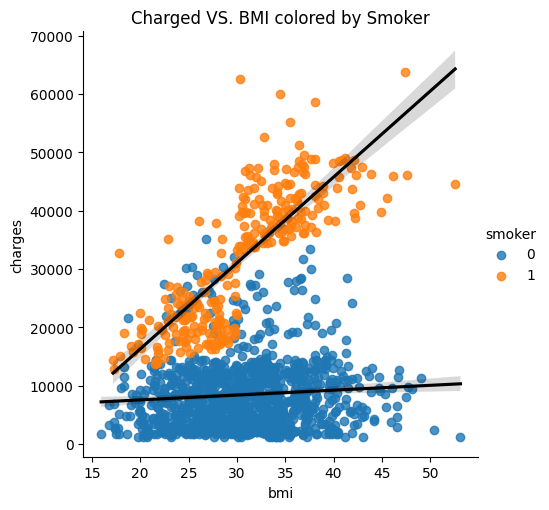

In [18]:
line_kws= dict(color='black')

ax=sns.lmplot(data=df, y='charges', x='bmi' , hue='smoker', line_kws=line_kws)
ax.set(title='Charged VS. BMI colored by Smoker')

- as expected from the previous task we can see that there is a huge positive correlation between the BMI and the Charges in the case of the smoker person we can visualize that by seeing the upper line, and there is a small positive corellation in the case of non-smoker we can see that from the lower line

# Explore Region

##12) Countplot For Region

/tmp/ipython-input-3195649245.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data =df, x='region', palette='Set1')


[Text(0.5, 1.0, 'Customers Distribution')]

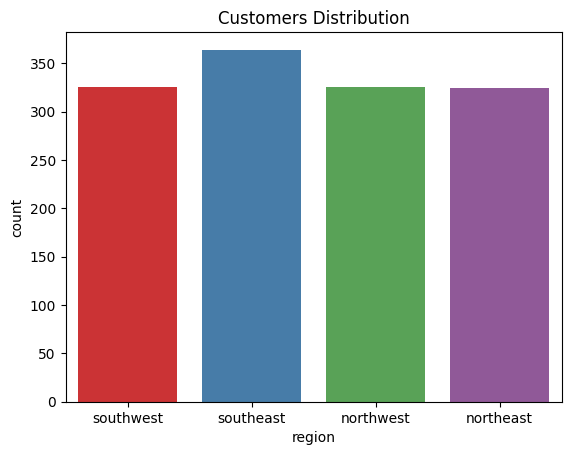

In [19]:
ax=sns.countplot(data =df, x='region', palette='Set1')
ax.set(title='Customers Distribution')

-We can see that all of the region distribution is close but the highest region dis is Southeast

##13) Barplot of Changes by Region

/tmp/ipython-input-2483483313.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=df, y='charges', x='region', palette='Set1')


[Text(0.5, 1.0, 'Charges Grouped by Region')]

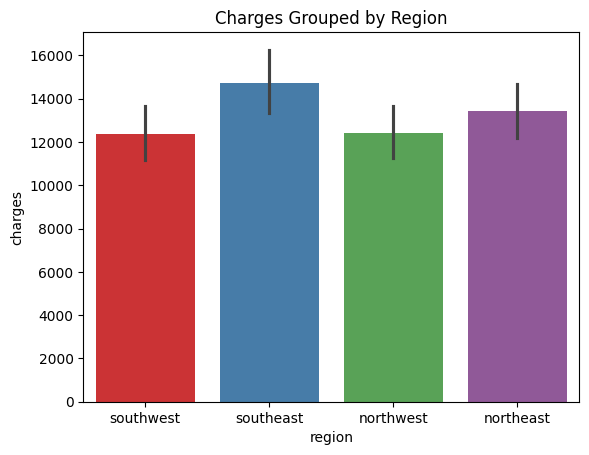

In [20]:
ax=sns.barplot(data=df, y='charges', x='region', palette='Set1')
ax.set(title='Charges Grouped by Region')

-Also southeast has the highest AVG Charges

##14) BarChart of the Ratios of Smoker in Each Region

In [21]:
percent_smoker_region = df.groupby('region')['smoker']
percent_smoker_region.mean()
percent_smoker_by_region = percent_smoker_region.mean()



In [22]:
ratio = percent_smoker_by_region*100
ratio

,smoker
region,
northeast,20.679012
northwest,17.846154
southeast,25.000000
southwest,17.846154


In [23]:
ratio_df = ratio.reset_index(name='smoker_perc')
ratio_df

,region,smoker_perc
0,northeast,20.679012
1,northwest,17.846154
2,southeast,25.000000
3,southwest,17.846154


[Text(0.5, 1.0, 'Smokers Percent in Each Region')]

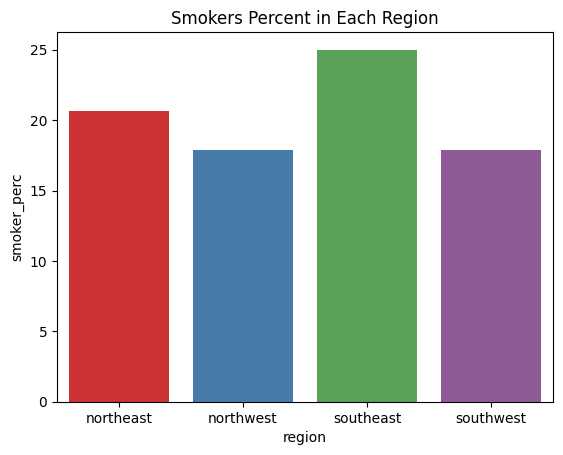

In [24]:
ax=sns.barplot(data=ratio_df, x='region', y='smoker_perc', palette='Set1',hue='region')

ax.set(title='Smokers Percent in Each Region')

-Southeast has the highest smokers percent

- After some Research We noticed that the Recommended BMI is between 18.5 and 24.9, so i will annotate the boarders

<Axes: xlabel='bmi', ylabel='Count'>

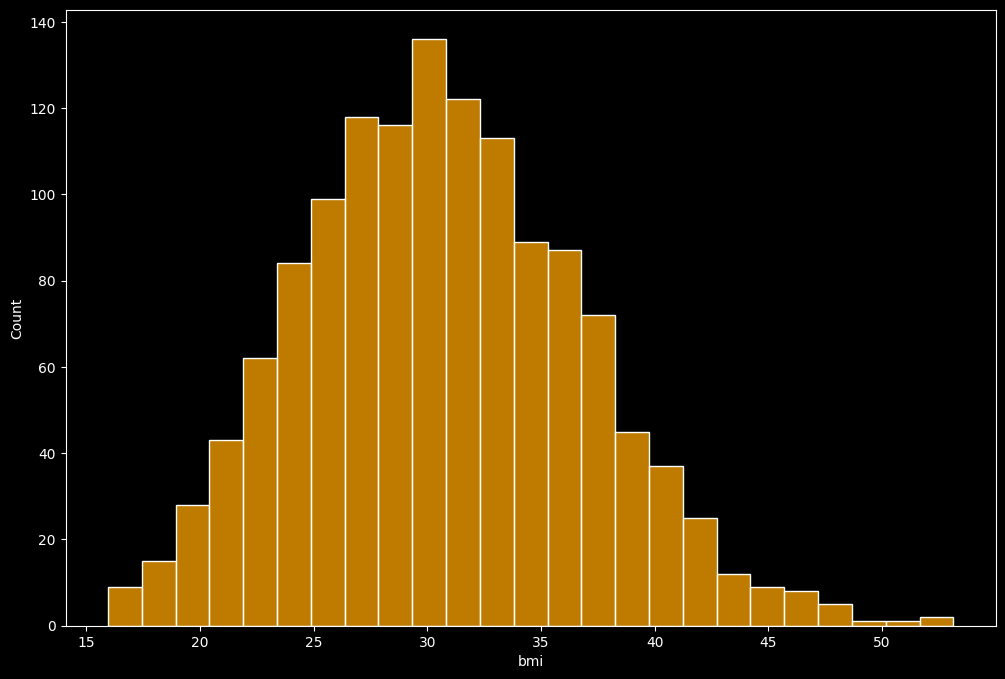

In [25]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12,8))
sns.histplot(data=df, x='bmi', color='orange')

- to annotate the min and max recommended

In [26]:
min_rec = 18.5
max_rec= 24.9

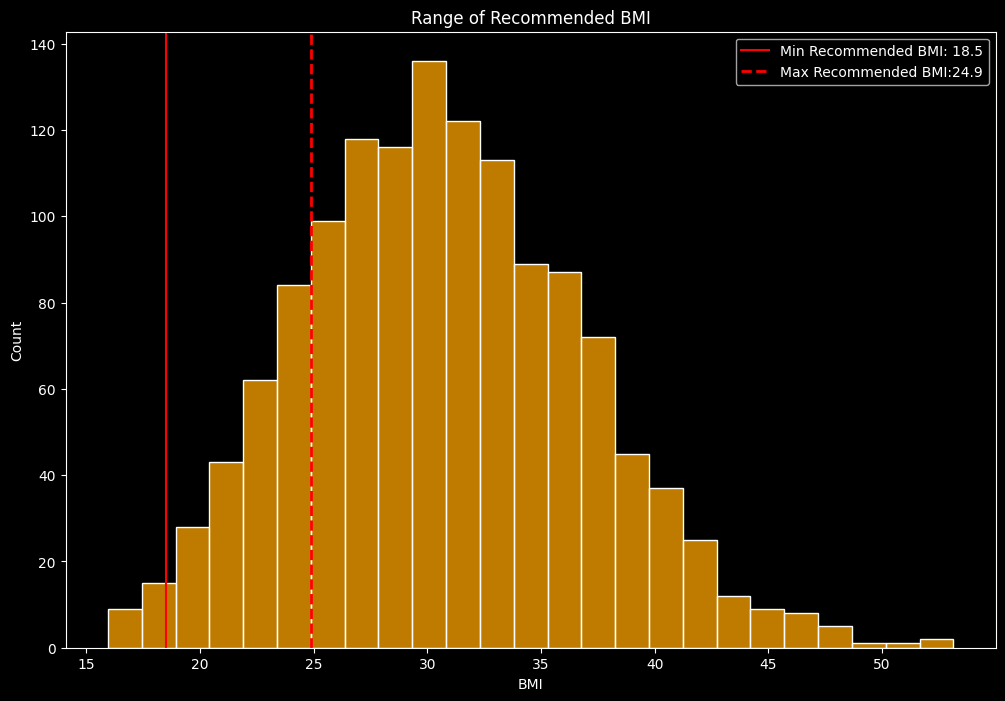

In [27]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12,8))
sns.histplot(data=df, x='bmi', color='orange')
ax.axvline(min_rec, color='red', label = f'Min Recommended BMI: {min_rec}')
ax.axvline(max_rec, color='red', label=f'Max Recommended BMI:{max_rec}', ls='--', lw=2)
ax.set_title ('Range of Recommended BMI')
ax.set_ylabel('Count')
ax.set_xlabel('BMI')
ax.legend()


## I will make a function to histoplot and annoatate any min and max points for any feature

In [1]:
def plot_annotation_using_histo (df, col):

  min_rec = 18.5
  max_rec - 24.9
  fig , ax = plt.subplots(figsize=(12,6))
  sns.histplot(data=df, x=col, ax=ax, color='orange')
  ax.set_title(col)
  ax.axvline(min_rec, color='red', label= f'Min Recom BMI: {min_rec}')
  ax.axvline(max_rec, color='red', label= f'Max Recom BMI: {max_rec}', ls='--', lw=2)
  ax.legend()


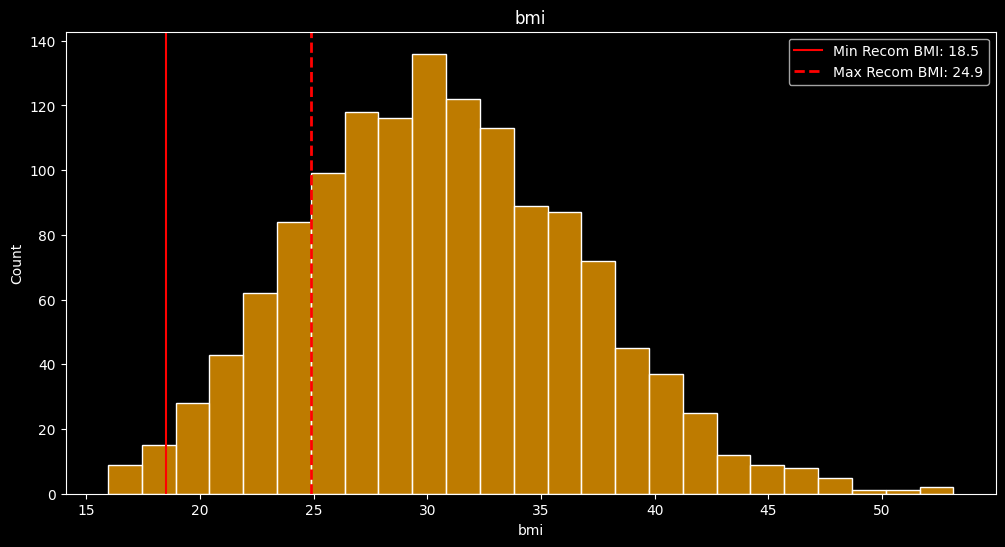

In [28]:
plot_annotation_using_histo(df, 'bmi')